In [1]:
import numpy as np
import tensorflow as tf
from keras import models
from keras import layers

# Laden der Features und der Labels
features = np.load('features.npy')
labels = np.load('labels.npy')

# Zum Testen des CNN
testx = features[:10000]
testy = labels[:10000]

# Auswahl der Features und Label vom Datensatz für das Trainieren
features = features[500000:501000] 
labels = labels[500000:501000]



# Die RGB-Werte(Features) müssen auf 0-1 skaliert werden
features = features/255.0

# Das CNN
# Das Model arbeitet sequentiell
# Aktivierungsfunktion kann ersetzt werden
# Die Anzahl der Neuronen der Layer kann verändert werden
model = models.Sequential()
model.add(layers.Conv2D(16, (3, 3), activation='relu', input_shape=features.shape[1:]))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

model.add(layers.Conv2D(16, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

model.add(layers.Flatten()) # "Abflachen" der Layer zu 1D
model.add(layers.Dense(16, activation='relu'))

model.add(layers.Dense(1, activation='sigmoid'))


# Auswahl der Loss-Function und des Optimizers
# binary_crossentropy muss bestehen bleiben, da binäres Problem
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Das CNN lernen lassen
# batch_size = Anzahl der übertragenen Datenpakete auf einmal
# epochs = Anzahl der Durchläufe durch alle Daten
# validation_split = Aufteilen der Gesamtdaten in Trainingsdaten und Validierungsdaten(20%)
history = model.fit(features, labels, batch_size=128, epochs=5, validation_split=0.2)


Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Train on 800 samples, validate on 200 samples
Epoch 1/5
800/800 [==============================] - 3s 4ms/step - loss: 0.6918 - acc: 0.5475 - val_loss: 0.6586 - val_acc: 0.8500
Epoch 2/5
800/800 [==============================] - 2s 3ms/step - loss: 0.6316 - acc: 0.8562 - val_loss: 0.5718 - val_acc: 0.8300
Epoch 3/5
800/800 [==============================] - 2s 3ms/step - loss: 0.5471 - acc: 0.8350 - val_loss: 0.4645 - val_acc: 0.8900
Epoch 4/5
800/800 [==============================] - 2s 3ms/step - loss: 0.4578 - acc: 0.8550 - val_loss: 0.3911 - val_acc: 0.8700
Epoch 5/5
800/800 [==============================] - 2s 3ms/step - loss: 0.4026 - acc: 0.8600 - val_loss: 0.3365 - val_acc: 0.8950


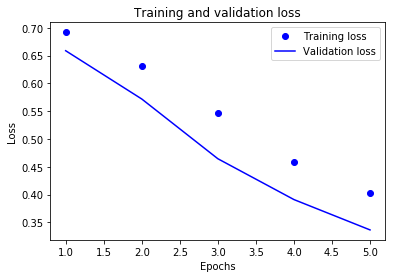

In [2]:
# Grafische (Verlaufs-)Darstellung des Loss

%matplotlib inline  
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" = Blauer Punkt
plt.plot(epochs, loss, 'bo', label='Training loss')
# "b" = Blaue Linie
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [3]:
# Loss und Accuracy werden berechnet
val_loss, val_acc = model.evaluate(testx, testy)
# Ausgabe der Ergebnisse
print(val_loss, val_acc)

10000/10000 [==============================] - 12s 1ms/step
4.581400226211548 0.7083
